In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

module_path = (Path().resolve().parent/ "Modules")
sys.path.append(str(module_path))

import my_modules, model_tuner, features

pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 100)

In [2]:
df = pd.read_csv("../Data/train_data_tmp.csv", encoding="shift-jis")
odds_df = pd.read_csv("../Data/Time_Series_Odds_win_odds.csv", encoding="shift-jis")

In [3]:
df2 = my_modules.preprocessing(df)

In [4]:
df3 = my_modules.common_process(df2)

C:\Users\ken05\Documents\others\HORSE_RACING\Modules\my_modules.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_num"] = df["place"].replace(place_dict).astype(int)


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252411 entries, 252634 to 0
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PCI                  251103 non-null  float64       
 1   PCI3                 252411 non-null  float64       
 2   RPCI                 252411 non-null  float64       
 3   race_id              252411 non-null  int64         
 4   year                 252411 non-null  int64         
 5   month                252411 non-null  int64         
 6   day                  252411 non-null  int64         
 7   times                252411 non-null  int64         
 8   place                252411 non-null  object        
 9   daily                252411 non-null  object        
 10  race_num             252411 non-null  int64         
 11  horse                252411 non-null  object        
 12  jockey_id            252411 non-null  object        
 13  trainer_id         

In [6]:
feature_col = ["waku_num", "horse_num", "sex", "age", "basis_weight", "weight", "inc_dec"]
df4, feature_col2 = features.feature_engineering(df3, feature_col)

calculating trueskill of horse is processing
calculating trueskill of jockey is processing
['waku_num', 'horse_num', 'sex', 'age', 'basis_weight', 'weight', 'inc_dec', 'weight_last_1', 'weight_last_2', 'weight_last_3', 'weight_mean_last_1_to_3', 'weight_mean_all', 'inc_dec_last_1', 'inc_dec_last_2', 'inc_dec_last_3', 'inc_dec_mean_last_1_to_3', 'inc_dec_mean_all', 'last_3F_time_last_1', 'last_3F_time_last_2', 'last_3F_time_last_3', 'last_3F_time_mean_last_1_to_3', 'last_3F_time_mean_all', 'Ave_3F_last_1', 'Ave_3F_last_2', 'Ave_3F_last_3', 'Ave_3F_mean_last_1_to_3', 'Ave_3F_mean_all', 'all_win_rate_horse', 'all_win_rate3_horse', 'horse_win_rate_dist', 'horse_win_rate3_dist', 'horse_win_rate_track_code', 'horse_win_rate3_track_code', 'horse_win_rate_field_type', 'horse_win_rate3_field_type', 'horse_win_rate_turn_type', 'horse_win_rate3_turn_type', 'horse_win_rate_weather', 'horse_win_rate3_weather', 'horse_win_rate_state', 'horse_win_rate3_state', 'horse_win_rate_place', 'horse_win_rate3

,PCI,PCI3,RPCI,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,trainer_id,horse_N,waku_num,horse_num,class_code,track_code,corner_num,dist,state,weather,age_code,sex,age,basis_weight,blinker,weight,inc_dec,weight_code,win_odds,win_odds_1,win_odds_1_pop,win_odds_2,win_odds_2_pop,win_mul_odds_Hi,win_mul_odds_Lo,win_mul_odds_1_Hi,win_mul_odds_1_Lo,win_mul_odds_1_pop,win_mul_odds_2_Hi,win_mul_odds_2_Lo,win_mul_odds_2_pop,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,last_3F_time_diff,leg,pop,prize,error_code,father,mother,broodmare_sire,broodmare_sire_type,horse_color,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,target,target3,weight_last_1,weight_last_2,weight_last_3,weight_mean_last_1_to_3,weight_mean_all,inc_dec_last_1,inc_dec_last_2,inc_dec_last_3,inc_dec_mean_last_1_to_3,inc_dec_mean_all,last_3F_time_last_1,last_3F_time_last_2,last_3F_time_last_3,last_3F_time_mean_last_1_to_3,last_3F_time_mean_all,Ave_3F_last_1,Ave_3F_last_2,Ave_3F_last_3,Ave_3F_mean_last_1_to_3,Ave_3F_mean_all,horse_win_rate_dist,horse_win_rate3_dist,horse_win_rate_track_code,horse_win_rate3_track_code,horse_win_rate_field_type,horse_win_rate3_field_type,horse_win_rate_turn_type,horse_win_rate3_turn_type,horse_win_rate_weather,horse_win_rate3_weather,horse_win_rate_state,horse_win_rate3_state,horse_win_rate_place,horse_win_rate3_place,horse_win_rate_corner_num,horse_win_rate3_corner_num,horse_win_rate_class_code,horse_win_rate3_class_code,horse_win_rate_basis_weight,horse_win_rate3_basis_weight,horse_win_rate_age_code,horse_win_rate3_age_code,horse_win_rate_weight_code,horse_win_rate3_weight_code,horse_win_rate_jockey_id,horse_win_rate3_jockey_id,horse_win_rate_jockey_id_class_code,horse_win_rate3_jockey_id_class_code,horse_win_rate_jockey_id_place,horse_win_rate3_jockey_id_place,horse_win_rate_jockey_id_dist,horse_win_rate3_jockey_id_dist,horse_win_rate_jockey_id_field_type,horse_win_rate3_jockey_id_field_type,horse_win_rate_jockey_id_place_dist,horse_win_rate3_jockey_id_place_dist,horse_win_rate_jockey_id_place_field_type_dist,horse_win_rate3_jockey_id_place_field_type_dist,horse_win_rate_weather_state,horse_win_rate3_weather_state,horse_win_rate_dist_corner_num,horse_win_rate3_dist_corner_num,horse_win_rate_dist_track_code,horse_win_rate3_dist_track_code,horse_win_rate_dist_class_code,horse_win_rate3_dist_class_code,horse_win_rate_place_field_type_dist,horse_win_rate3_place_field_type_dist,horse_win_rate_place_field_type_dist_class_code,horse_win_rate3_place_field_type_dist_class_code,all_win_rate_horse,all_win_rate3_horse,all_win_rate_dist_waku,all_win_rate3_dist_waku,all_win_rate_field_type_waku,all_win_rate3_field_type_waku,all_win_rate_place_waku,all_win_rate3_place_waku,all_win_rate_field_type_dist_waku,all_win_rate3_field_type_dist_waku,all_win_rate_dist_place_waku,all_win_rate3_dist_place_waku,all_win_rate_field_type_place_waku,all_win_rate3_field_type_place_waku,all_win_rate_race_type_waku,all_win_rate3_race_type_waku,all_win_rate_corner_num_waku,all_win_rate3_corner_num_waku,all_win_rate_corner_num_dist_waku,all_win_rate3_corner_num_dist_waku,all_win_rate_corner_num_place_waku,all_win_rate3_corner_num_place_waku,all_win_rate_corner_num_field_type_waku,all_win_rate3_corner_num_field_type_waku,all_win_rate_jockey_id,all_win_rate3_jockey_id,all_win_rate_jockey_id_place,all_win_rate3_jockey_id_place,all_win_rate_jockey_id_place_dist,all_win_rate3_jockey_id_place_dist,all_win_rate_jockey_id_field_type,all_win_rate3_jockey_id_field_type,all_win_rate_jockey_id_field_type_dist,all_win_rate3_jockey_id_field_type_dist,all_win_rate_jockey_id_field_type_place,all_win_rate3_jockey_id_field_type_place,all_win_rate_jockey_id_dist,all_win_rate3_jockey_id_dist,all_win_rate_jockey_id_race_type,all_win_rate3_jockey_id_race_type,all_win_rate_jockey_id_race_type_waku,all_win_rate3_jockey_id_race_type_waku,all_win_rate_jockey_id_class_code,all_win_rate3_jockey_id_c

[I 2025-06-24 00:05:14,970] A new study created in memory with name: no-name-38d47af1-9a3b-4769-b676-441c30a9e298
[I 2025-06-24 00:05:22,164] Trial 0 finished with value: 0.21771457326548366 and parameters: {'max_bin': 102, 'num_leaves': 96, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 5.9865848459837805, 'bagging_fraction': 0.3248149123539492, 'bagging_freq': 16, 'feature_fraction': 0.15227525095137953, 'lambda_l1': 0.6245760287469893, 'lambda_l2': 0.002570603566117598, 'min_gain_to_split': 7.080725777960454, 'max_depth': 4, 'learning_rate': 0.7579479953348001, 'path_smooth': 8.324426408004218}. Best is trial 0 with value: 0.21771457326548366.
[I 2025-06-24 00:05:48,247] Trial 1 finished with value: 0.21218641323388593 and parameters: {'max_bin': 62, 'num_leaves': 20, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 3.0424224365529544, 'bagging_fraction': 0.6198051453057902, 'bagging_freq': 44, 'feature_fraction': 0.36210622617823773, 'lambda_l1': 0.0032112643094417484, 'lambd

Best params :  {'max_bin': 62, 'num_leaves': 20, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 3.0424224365529544, 'bagging_fraction': 0.6198051453057902, 'bagging_freq': 44, 'feature_fraction': 0.36210622617823773, 'lambda_l1': 0.0032112643094417484, 'lambda_l2': 1.8007140198129195e-07, 'min_gain_to_split': 2.9214464853521815, 'max_depth': 38, 'learning_rate': 0.006672367170464205, 'path_smooth': 7.851759613930136}


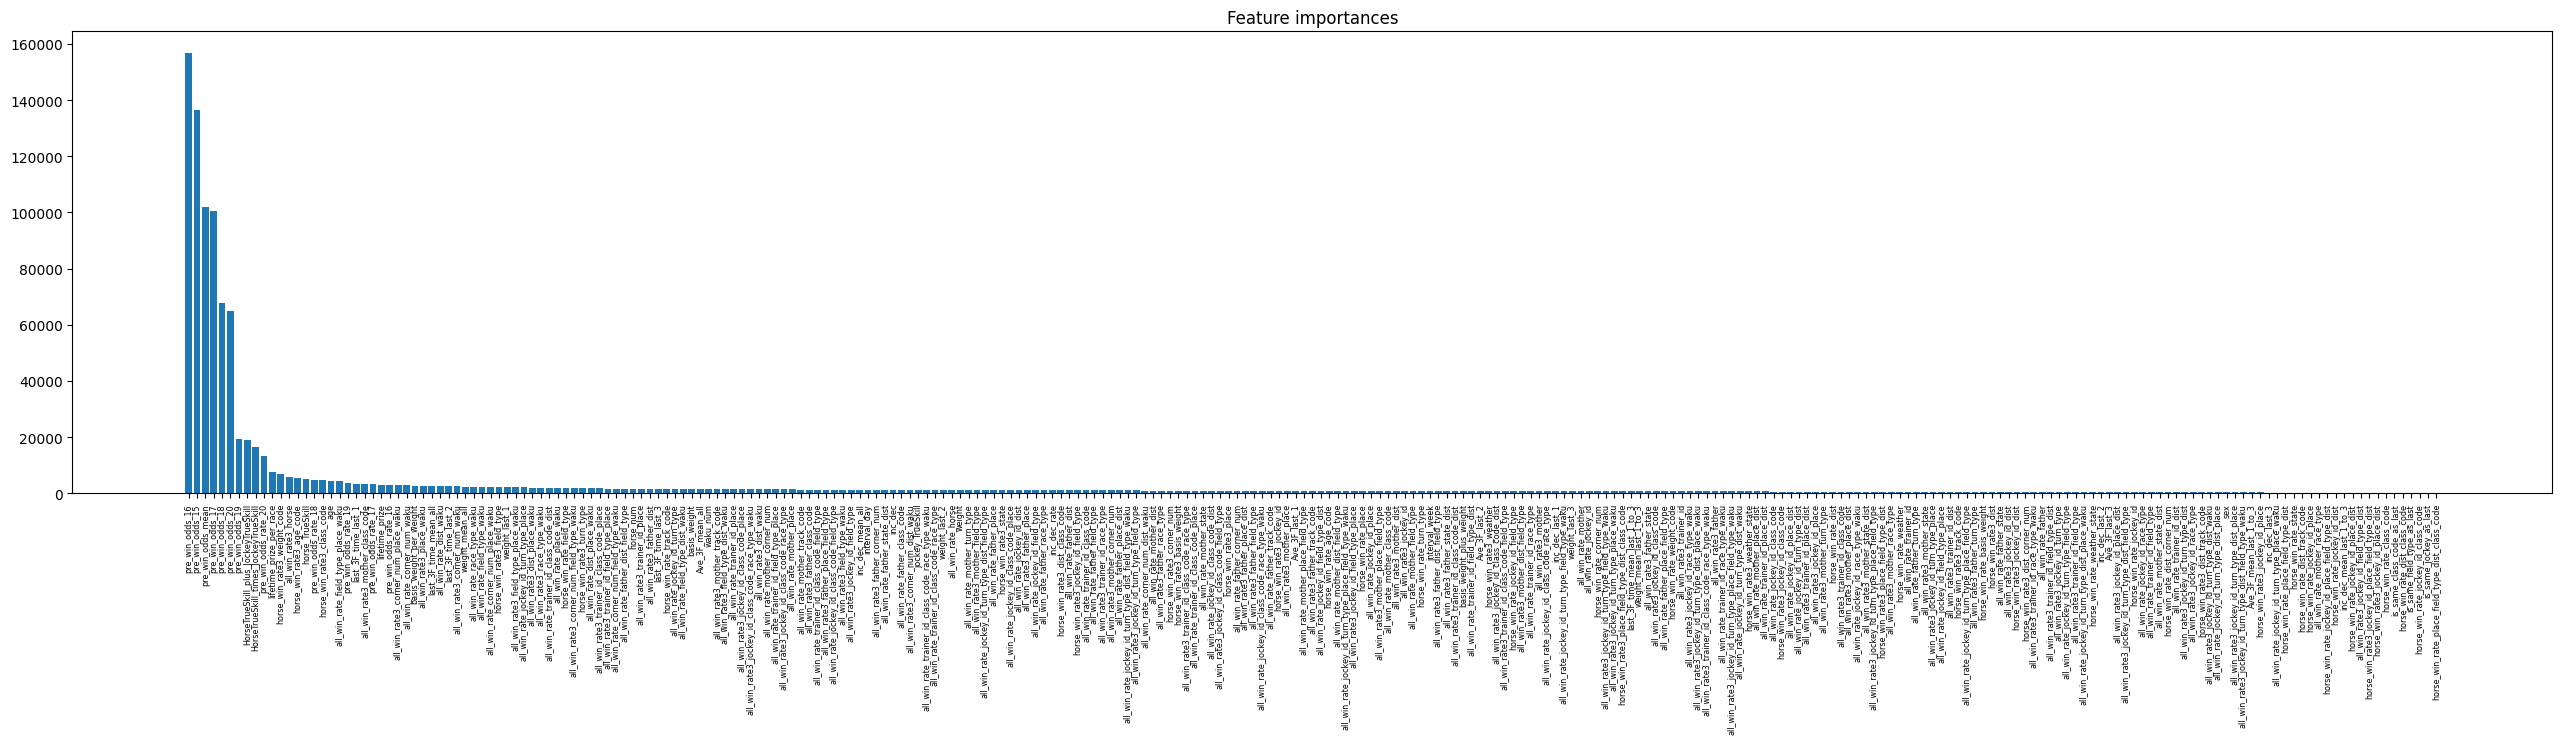

array([0.00394974, 0.120218  , 0.0162824 , ..., 0.0950837 , 0.16345486,
       0.20409227], shape=(75991,))

176420    0
176421    0
176422    0
176423    0
176424    0
         ..
252406    0
252407    0
252408    0
252409    0
252410    1
Name: target, Length: 75991, dtype: int64

In [7]:
memo = "add pre_win_odds, reduce features more. n_rials=50."
model, df_pred = model_tuner.simple_lightGBM(df4, feature_col2, memo=memo, n_trials=3, save_result=False, visualization=True)

In [11]:
tmp =  df_pred[["id_for_fold", "horse", "pred"]].sort_values("pred", ascending=False)
tmp.head(5)

,id_for_fold,horse,pred
207687,2024062302010605,ヤンキーバローズ,0.712840
233205,2025012506010806,クレーキング,0.660306
211595,2024072704020101,エンブロイダリー,0.645149
223296,2024110205050112,ウインオーディン,0.635264
210666,2024072001010101,ポッドベイダー,0.631876


In [12]:
df_pred[["id_for_fold", "horse", "pred"]].sort_values("pred", ascending=False).tail()

,id_for_fold,horse,pred
202871,2024051805020904,ヒナノマーチス,0.001943
233658,2025012606010905,ギリギリバイター,0.001943
179183,2023111805050502,ミユキアテスウェイ,0.001934
209287,2024070710030401,イチザマジック,0.001831
192681,2024030206020305,ソーリャ,0.001770


In [14]:
df_pred[["race_id", "id_for_fold", "horse", "pred", "win_odds", "target"]]

,race_id,id_for_fold,horse,pred,win_odds,target
176420,202310280802080208,2023102808020802,サウンドルミネ,0.005423,467.0,0
176421,202310280802080212,2023102808020802,アルピニスト,0.165064,5.1,0
176422,202310280802080203,2023102808020802,レグノ,0.022356,65.4,0
176423,202310280802080201,2023102808020802,テイエムデンセツ,0.097506,13.8,0
176424,202310280802080210,2023102808020802,キモンキャリントン,0.027814,53.5,0
...,...,...,...,...,...,...
252406,202506150201021202,2025061502010212,デルマムーン,0.131645,8.3,0
252407,202506150201021204,2025061502010212,ボエーム,0.004618,104.5,0
252408,202506150201021201,2025061502010212,モーメントキャッチ,0.106163,5.8,0
252409,202506150201021207,2025061502010212,トモジャザーン,0.182501,3.7,0


In [16]:
# 各レースで、一番確率が高い単勝のみ購入した場合の勝ち額
def calc_max_pred_strategy(pred_df):
    pred_df["max_pred"] = pred_df.groupby("id_for_fold", observed=True)["pred"].transform("max")
    pred_df["max_pred_flg"] = pred_df["max_pred"] == pred_df["pred"]
    pred_df["bought_ticket_flg"] = pred_df["max_pred_flg"].astype(int)
    pred_df["bought_and_winning_odds"] = pred_df["bought_ticket_flg"] * pred_df["target"] * pred_df["win_odds"]


    # とりあえず100円賭ける
    total_win = pred_df["bought_and_winning_odds"].sum() * 100  # 払戻額（円単位）
    bought_ticket_sum = pred_df["bought_ticket_flg"].sum()
    total_bet = bought_ticket_sum * 100  # 賭け金（1点100円）
    net_profit = total_win - total_bet

    print(f"購入点数: {bought_ticket_sum}点")
    print(f"払い戻し合計: {total_win:.1f}円")
    print(f"投資額: {total_bet}円")
    print(f"収支: {net_profit:.1f}円")
    print(f"ROI（回収率）: {total_win / total_bet * 100:.2f}%")

calc_max_pred_strategy(df_pred)

購入点数: 5452点
払い戻し合計: 440430.0円
投資額: 545200円
収支: -104770.0円
ROI（回収率）: 80.78%


In [17]:
tmp = df_pred[["race_id", "id_for_fold", "horse", "pred", "target", "win_odds"]]
pre_win_odds = odds_df[["race_id", "pre_win_odds_20"]]
tmp = pd.merge(left=tmp, right=pre_win_odds, how="left", on="race_id")
tmp["exp_value"] = tmp["pred"] * tmp["pre_win_odds_20"]
tmp.head()

,race_id,id_for_fold,horse,pred,target,win_odds,pre_win_odds_20,exp_value
0,202310280802080208,2023102808020802,サウンドルミネ,0.005423,0,467.0,453.1,2.457230
1,202310280802080212,2023102808020802,アルピニスト,0.165064,0,5.1,5.5,0.907852
2,202310280802080203,2023102808020802,レグノ,0.022356,0,65.4,64.0,1.430807
3,202310280802080201,2023102808020802,テイエムデンセツ,0.097506,0,13.8,13.8,1.345581
4,202310280802080210,2023102808020802,キモンキャリントン,0.027814,0,53.5,54.8,1.524184


In [20]:
def calc_max_exp_value_strategy(df):
    df["max_exp"] = df.groupby("id_for_fold", observed=True)["exp_value"].transform("max")
    df["max_exp_flg"] = (df["max_exp"] == df["exp_value"]) & (df["exp_value"] > 1) & (df["pred"] > 0.10) & (df["win_odds"] < 50)
    df["bought_ticket_flg"] = df["max_exp_flg"].astype(int)
    df["bought_and_winning_odds"] = df["bought_ticket_flg"] * df["target"] * df["win_odds"]

    # とりあえず100円賭ける
    total_win = df["bought_and_winning_odds"].sum() * 100  # 払戻額（円単位）
    bought_ticket_sum = df["bought_ticket_flg"].sum()
    total_bet = bought_ticket_sum * 100  # 賭け金（1点100円）
    net_profit = total_win - total_bet

    display(df[df["bought_ticket_flg"] == 1].head(20))

    print(f"購入点数: {bought_ticket_sum}点")
    print(f"払い戻し合計: {total_win:.1f}円")
    print(f"投資額: {total_bet}円")
    print(f"収支: {net_profit:.1f}円")
    print(f"ROI（回収率）: {total_win / total_bet * 100:.2f}%")

    return df

calc_df = calc_max_exp_value_strategy(tmp)

,race_id,id_for_fold,horse,pred,target,win_odds,pre_win_odds_20,exp_value,max_exp,max_exp_flg,bought_ticket_flg,bought_and_winning_odds
39,202310280802080306,2023102808020803,ダノンデサイル,0.108898,1,11.3,11.1,1.208765,1.208765,True,1,11.3
50,202310280404050310,2023102804040503,ツヴァイシュテルネ,0.157168,0,9.4,10.0,1.571679,1.571679,True,1,0.0
99,202310280802080508,2023102808020805,マテンロウガーデン,0.116741,0,15.3,15.3,1.786143,1.786143,True,1,0.0
138,202310280802080610,2023102808020806,コンプラセンシア,0.105894,0,11.2,12.5,1.323672,1.323672,True,1,0.0
288,202310280504081008,2023102805040810,バルサムノート,0.165527,0,6.7,6.7,1.109034,1.109034,True,1,0.0
300,202310280802081011,2023102808020810,ミッキーヌチバナ,0.117856,1,10.8,10.8,1.272841,1.272841,True,1,10.8
351,202310280404051105,2023102804040511,セレシオン,0.206124,0,6.6,6.4,1.319193,1.319193,True,1,0.0
367,202310280504081205,2023102805040812,バルミュゼット,0.221173,0,3.9,4.8,1.061631,1.061631,True,1,0.0
388,202310280404051205,2023102804040512,アロットドリーム,0.228759,0,3.6,4.8,1.098042,1.098042,True,1,0.0
417,202310290802090102,2023102908020901,クリノオリーブ,0.172437,0,7.4,7.4,1.276032,1.276032,True,1,0.0


購入点数: 1586点
払い戻し合計: 143890.0円
投資額: 158600円
収支: -14710.0円
ROI（回収率）: 90.73%


In [68]:
df_pred.groupby("id_for_fold", observed=True)["pred"].sum()

id_for_fold
2023102804040502    0.999963
2023102804040503    0.798928
2023102804040505    1.222730
2023102804040506    0.882155
2023102804040507    0.858929
                      ...   
2025061509030408    1.150208
2025061509030409    1.096029
2025061509030410    1.027582
2025061509030411    1.254479
2025061509030412    1.160764
Name: pred, Length: 5452, dtype: float64

In [ ]:
# 正規化 + キャリブレーション + ケリー基準